### Executando uma Regressão em Python

In [3]:
# Importantos bibliotecas necessárias:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


Obtendo os Dados para a Regressão:

In [6]:
# Carregando os Dados:
data = pd.read_excel('Housing.xlsx')
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [7]:
# Extraindo os dados para a Regressão em uma nova tabela:
regre_data = data[['House Price', 'House Size (sq.ft.)']]
regre_data

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


In [8]:
# Atribuindo os dados desejados a variáveis:
x = data['House Size (sq.ft.)'] # variável independente
y = data['House Price'] # variável dependente

In [9]:
x

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [10]:
y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

Plotando Gráficos com os Dados:

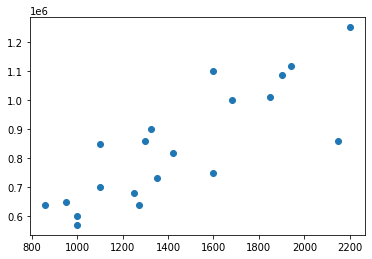

In [13]:
# Criando um Gráfico de Dispersão (scatter plot) com as variáveis:
plt.scatter(x,y)
plt.show()

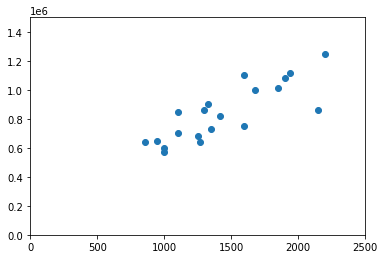

In [14]:
# Definindo os limites dos eixos do gráfico de dispersão - importante para otimizar a posição dos pontos:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000]) # limites dos eixos: x - 0,2500, y - 0,1500000
plt.show()

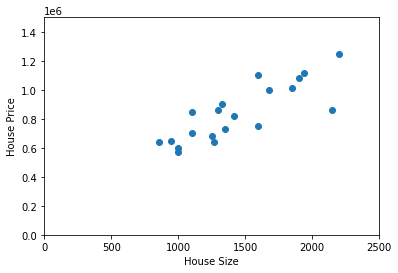

In [15]:
# Atribuindo Labels aos Eixos do Gráfico:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price') # define o label do eixo y
plt.xlabel('House Size') # define o label do eixo x
plt.show()

Gerando e Avaliando a Regressão:

In [16]:
# Prepara os dados para a Regressão:
x1 = sm.add_constant(x) # atribui a variável independente para o modelo

In [17]:
# Gera a Regressão:
reg = sm.OLS(y,x1).fit()

In [18]:
# Visualiza os Resultados da Regressão:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           8.13e-06
Time:                        17:46:37   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Calculando um Preço de uma casa:
alpha = 260800
beta = 402
house_size = 1000

house_price = alpha + beta * house_size
house_price

662800

Obtendo Estatísticas com a Biblioteca Scipy:

In [29]:
beta2, alpha2, r_value, p_value, std_err = stats.linregress(x,y)

In [30]:
# Inclinação:
beta2

401.91628631922595

In [31]:
# Intercepto:
alpha2

260806.2360560964

In [26]:
# R-quadrado
r_value ** 2

0.678279986579124

In [27]:
p_value

8.129642377231308e-06

In [28]:
# Erro Padrão:
std_err

65.24299510636492

In [35]:
# Estimativa:
tamanho = 1500
print(f'Tamanho da Casa: {tamanho:.2f} m²\nPreço da Casa: R${alpha2 + beta2*tamanho:.2f}')

Tamanho da Casa: 1500.00 m²
Preço da Casa: R$863680.67
